<center><h1>DSCI-552 HOMEWORK 1</h1>
<br>
<font size="3">Name: Vorapoom Thirapatarapong</font>
<br>
<font size="3">USC ID: 4397330150 Github Username: bvorapoom</font></center>

<b> Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as mt

<b> Loading .arff dataset from local file

In [2]:
arff_vtb = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df_vtb = pd.DataFrame(arff_vtb[0])

# clean values for class name
df_vtb['class'] = df_vtb['class'].astype('str').str.strip('b\'').str.strip('\'')
df_vtb['class'] = df_vtb['class'].map({'Normal':0, 'Abnormal':1})
print(df_vtb.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  class  
0      98.672917                 -0.254400      1  
1     114.405425                  4.564259      1  
2     105.985135                 -3.530317      1  
3     101.868495                 11.211523      1  
4     108.168725                  7.918501      1  


# (b) Pre-Processing and Exploratory data analysis

<font size = "3"><b>(b)-i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1. </font>

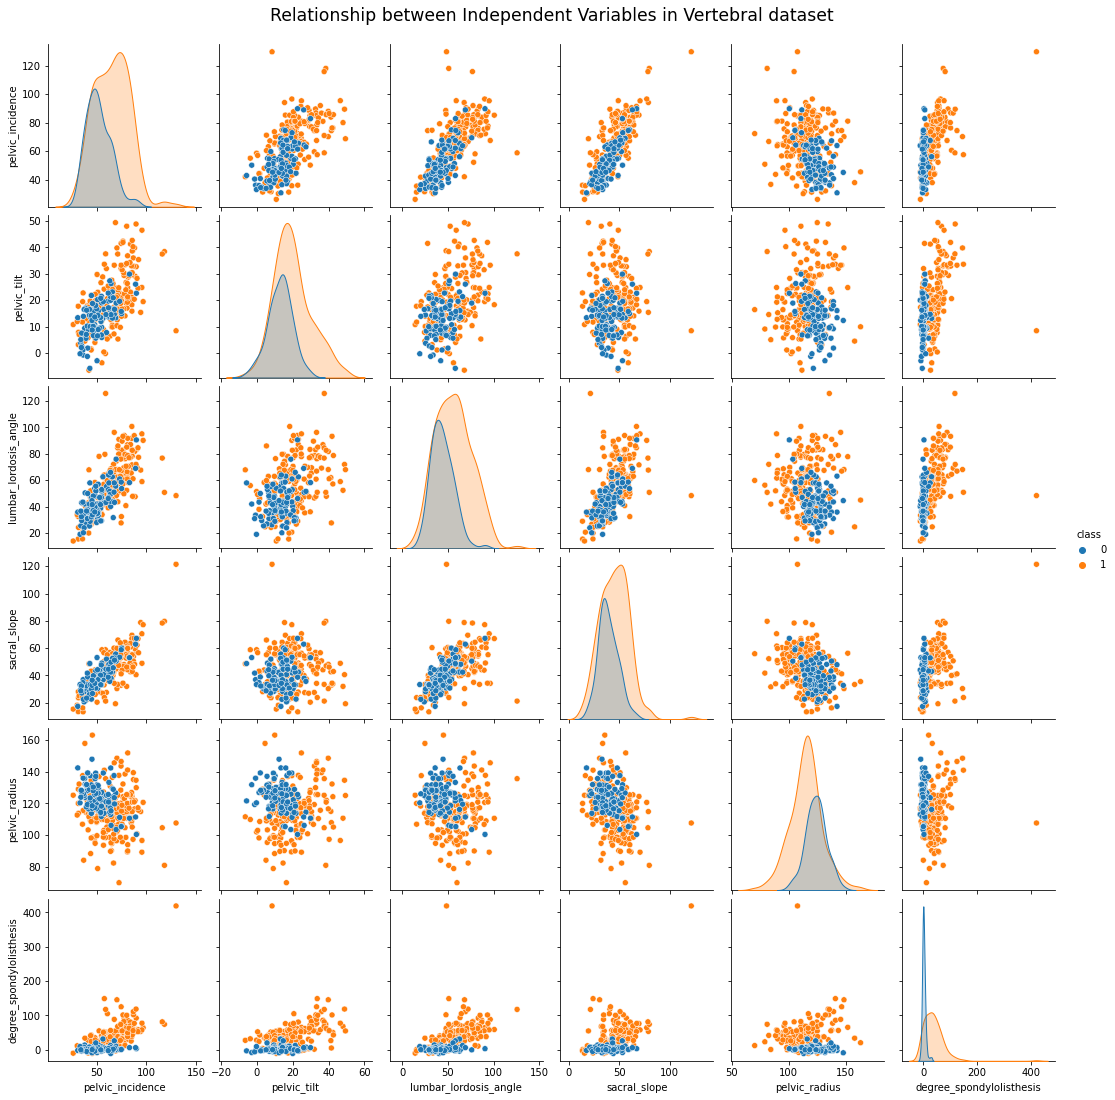

In [3]:
# pairplot plots of independent variables by class
sns.pairplot(data = df_vtb, hue = 'class')
plt.suptitle('Relationship between Independent Variables in Vertebral dataset', y = 1.02, fontsize = 'xx-large')
plt.show()

> Quick findings from the pairplot of the independent variables are that Class 0 has the lower average values on all the attributes except the pelvic_radius, and the data is less dispersed. Also, from this bivariate plot, we also see some kinds of boundaries that classify the two classes.

<font size = "3"><b> (b)-ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129). </font>

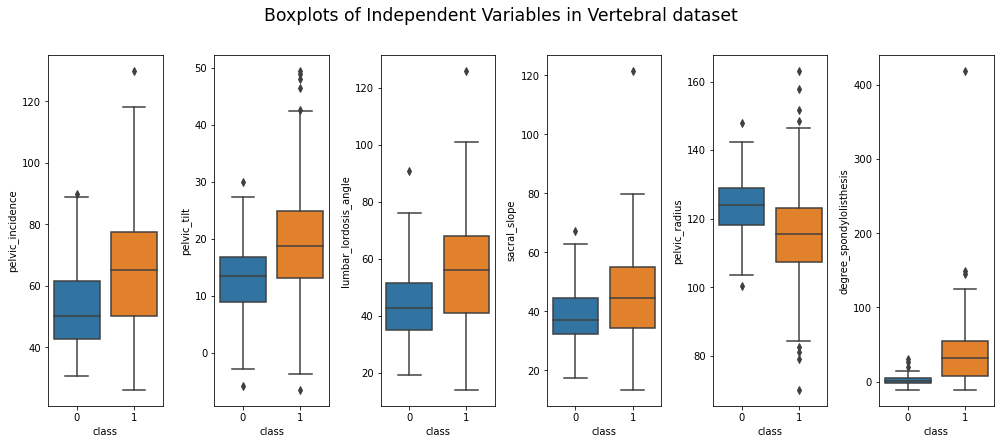

In [4]:
#  boxplots of each independent variable
fig, ax = plt.subplots(1, 6, figsize = (14, 6))

for i in range(6):
    sns.boxplot(ax = ax[i], data = df_vtb, y = df_vtb.columns[i], x = 'class')

fig.suptitle('Boxplots of Independent Variables in Vertebral dataset', y = 1.02, fontsize = 'xx-large')
fig.tight_layout()    
plt.show()

> Similar to what we observed from the histogram of the pairplot above, we see that the average values of all attributes of Class 0 is less that those of Class 1 except from pelvic_radius. Also, we see that Class 0 is less dispersed as the box is shorter (lower IQR). Moreover, we also see some outliers which are outside the [Q1 - 1.5IQR, Q3 + 1.5IQR] range

<font size = "3"><b> (b)-iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.</font>

In [5]:
# Split training and testing dataset (first 70 rows of Class 0 and first 140 rows of Class 1 as training set)

training_set = pd.concat([df_vtb[df_vtb['class'] == 0][:70], df_vtb[df_vtb['class'] == 1][:140]], ignore_index = True)
testing_set = pd.concat([df_vtb[df_vtb['class'] == 0][70:], df_vtb[df_vtb['class'] == 1][140:]], ignore_index = True)

X_train = training_set.loc[:, training_set.columns != 'class']
y_train = training_set.loc[:, 'class']
X_test = testing_set.loc[:, testing_set.columns != 'class']
y_test = testing_set.loc[:, 'class']


# (c) Classification using KNN on Vertebral Column Data Set

<font size = "3"><b> (c)-i. Write code for k-nearest neighbors with Euclidean metric (or use a software package) </font>
<br>
Decided to use scikit-learn package which is imported in the beginning (from sklearn.neighbors import KNeighborsClassifier)

<font size = "3"><b> (c)-ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Cal- culate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k* </font>

In [6]:
# K-Nearest Neighbors with Euclidean metric

list_k = np.arange(208, 0, -1)

# create a dataframe to store all training and testing errors
df_knn_accuracy = pd.DataFrame(columns = ['distance_type', 'weight_type', 'k', 'p', 'training_error_rate', 'testing_error_rate'])

for k in list_k:
    knn_euclidean = KNeighborsClassifier(n_neighbors = k)
    knn_euclidean.fit(X_train, y_train)
    training_error_rate = 1 - knn_euclidean.score(X_train, y_train)
    testing_error_rate = 1 - knn_euclidean.score(X_test, y_test)
    df_knn_accuracy.loc[len(df_knn_accuracy), :] = ['Euclidean', 'Uniform', k, 2, training_error_rate, testing_error_rate]
    

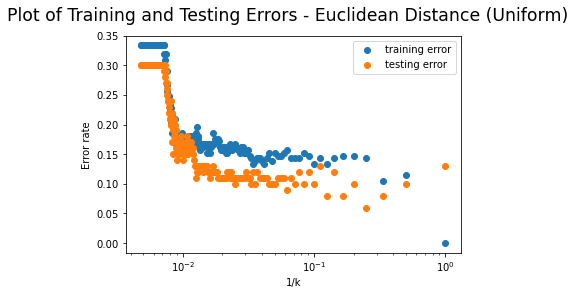

In [7]:
# Plot training and testing errors for different k values
df_knn_accuracy_euclidean = df_knn_accuracy[(df_knn_accuracy.distance_type == 'Euclidean') & (df_knn_accuracy.weight_type == 'Uniform')]

plt.scatter(1/df_knn_accuracy_euclidean['k'], df_knn_accuracy_euclidean['training_error_rate'], label = 'training error')
plt.scatter(1/df_knn_accuracy_euclidean['k'], df_knn_accuracy_euclidean['testing_error_rate'], label = 'testing error')

plt.rcParams["figure.figsize"] = (12,6)
plt.suptitle('Plot of Training and Testing Errors - Euclidean Distance (Uniform)', fontsize = 'xx-large')
plt.xlabel('1/k')
plt.ylabel('Error rate')
plt.xscale('log')
plt.legend()
plt.show()

In [8]:
# find k that gives the best testing error rate
df_knn_accuracy_euclidean_best = df_knn_accuracy_euclidean[df_knn_accuracy_euclidean.testing_error_rate == df_knn_accuracy_euclidean.testing_error_rate.min()]
print(df_knn_accuracy_euclidean_best)


    distance_type weight_type  k  p training_error_rate testing_error_rate
204     Euclidean     Uniform  4  2            0.142857               0.06


> k = 4 gives the best testing accuracy for euclidean distance

In [9]:
# Finding confusion matrix, true positive, true negative, precision, F1-score for k* (optimal k value) = 4: 

knn_euclidean_4 = KNeighborsClassifier(n_neighbors = 4)
knn_euclidean_4.fit(X_train, y_train)
y_pred = knn_euclidean_4.predict(X_test)

cfm = mt.confusion_matrix(y_test, y_pred)
TN = cfm[0][0]
FN = cfm[1][0]
TP = cfm[1][1]
FP = cfm[0][1]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('Confusion matrix for k = 4 is ', cfm, sep = '\n')
print('True positive rate for k = 4 is ', round(TP / (TP + FN), 4))
print('True negative rate for k = 4 is ', round(TN / (TN + FP), 4))
print('Precision for k = 4 is ', round(precision, 4))
print('F1-score for k = 4 is ', round(2 * (precision * recall) / (precision + recall), 4))

Confusion matrix for k = 4 is 
[[25  5]
 [ 1 69]]
True positive rate for k = 4 is  0.9857
True negative rate for k = 4 is  0.8333
Precision for k = 4 is  0.9324
F1-score for k = 4 is  0.9583


<font size = "3"><b> (c)-iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}. Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.</font>

In [10]:
# Learning curve with different sizes of training data

list_n = np.arange(10, 220, 10)
list_k = np.arange(1, 200, 5)
df_result_subset_n = pd.DataFrame(columns = ['sample_size', 'k', 'training_error_rate', 'testing_error_rate'])

for n in list_n:
    ss_training_set = pd.concat([df_vtb[df_vtb['class'] == 0][:math.floor(n / 3)], df_vtb[df_vtb['class'] == 1][:math.floor(2*n/3)]], ignore_index = True)
    
    ss_X_train = ss_training_set.loc[:, training_set.columns != 'class']
    ss_y_train = ss_training_set.loc[:, 'class']
    
    for k in list_k:
        if k <= n:
            knn_euclidean = KNeighborsClassifier(n_neighbors = k)
            knn_euclidean.fit(ss_X_train, ss_y_train)
            ss_training_error_rate = 1 - knn_euclidean.score(ss_X_train, ss_y_train)
            ss_testing_error_rate = 1 - knn_euclidean.score(X_test, y_test)
            df_result_subset_n.loc[len(df_result_subset_n), :] = [n, k, ss_training_error_rate, ss_testing_error_rate]



In [11]:
# Get the best testing error rate for different training data subset sizes
df_result_subset_n_best = df_result_subset_n.sort_values('testing_error_rate', ascending = True).drop_duplicates(['sample_size'])
df_result_subset_n_best = df_result_subset_n_best.sort_values('sample_size', ascending = True).reset_index(drop = True)
print(df_result_subset_n_best)


   sample_size   k training_error_rate testing_error_rate
0           10   1                 0.0               0.24
1           20   6            0.210526               0.19
2           30   1                 0.0               0.22
3           40  11            0.179487               0.25
4           50  16            0.244898                0.3
5           60  21            0.266667               0.29
6           70  26            0.275362               0.29
7           80  31            0.303797               0.29
8           90  46                 0.3               0.29
9          100  46            0.292929               0.28
10         110   6            0.192661               0.23
11         120  16            0.191667               0.17
12         130  16            0.193798               0.16
13         140  26             0.18705               0.15
14         150  16                0.18               0.13
15         160  16            0.169811               0.13
16         170

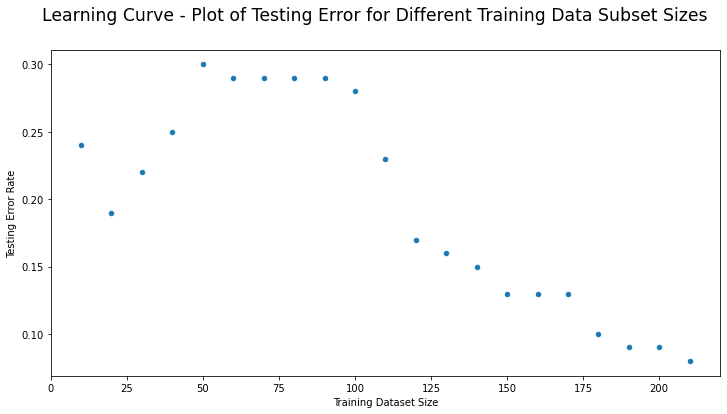

In [12]:
# Plot the best testing error rate for each sample size
df_result_subset_n_best.plot.scatter(x = 'sample_size', y = 'testing_error_rate')
plt.rcParams["figure.figsize"] = (12,6)
plt.suptitle('Learning Curve - Plot of Testing Error for Different Training Data Subset Sizes', fontsize = 'xx-large')
plt.xlabel('Training Dataset Size')
plt.ylabel('Testing Error Rate')
plt.show()

# (d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}

<font size = "3"><b> (d)-i. Minkowski Distance </font>

<font size = "2.5"><b> (d)-i-A. Manhattan Distance with p = 1. </font>

In [13]:
# K-Nearest Neighbor using Manhattan Distance (Minkowski with p = 1)

for k in list_k:
    knn_manhattan = KNeighborsClassifier(n_neighbors = k, p = 1)
    knn_manhattan.fit(X_train, y_train)
    training_error_rate = 1 - knn_manhattan.score(X_train, y_train)
    testing_error_rate = 1 - knn_manhattan.score(X_test, y_test)
    df_knn_accuracy.loc[len(df_knn_accuracy), :] = ['Manhattan', 'Uniform', k, 1, training_error_rate, testing_error_rate]


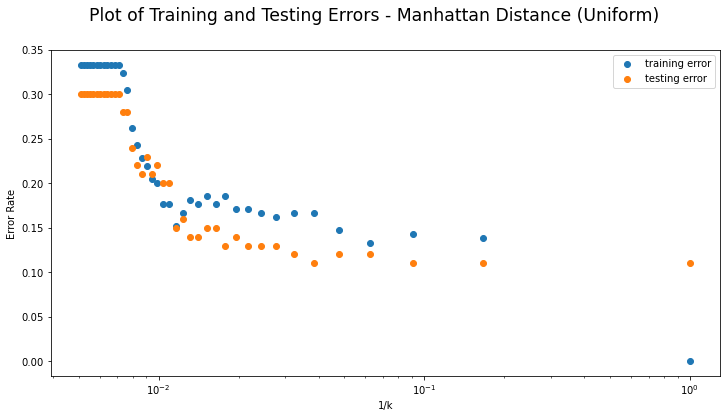

In [14]:
# Plot training and testing errors for different k values - Manhattan distance
df_knn_accuracy_manhattan = df_knn_accuracy[(df_knn_accuracy.distance_type == 'Manhattan') & (df_knn_accuracy.weight_type == 'Uniform')]

plt.scatter(1/df_knn_accuracy_manhattan['k'], df_knn_accuracy_manhattan['training_error_rate'], label = 'training error')
plt.scatter(1/df_knn_accuracy_manhattan['k'], df_knn_accuracy_manhattan['testing_error_rate'], label = 'testing error')

plt.rcParams["figure.figsize"] = (12,6)
plt.suptitle('Plot of Training and Testing Errors - Manhattan Distance (Uniform)', fontsize = 'xx-large')
plt.xlabel('1/k')
plt.ylabel('Error Rate')
plt.xscale('log')
plt.legend()
plt.show()

In [15]:
# Get the best testing error rate of different k using Manhattan distance
df_knn_accuracy_manhattan_best = df_knn_accuracy_manhattan[df_knn_accuracy_manhattan.testing_error_rate == df_knn_accuracy_manhattan.testing_error_rate.min()]
print(df_knn_accuracy_manhattan_best)


    distance_type weight_type   k  p training_error_rate testing_error_rate
208     Manhattan     Uniform   1  1                 0.0               0.11
209     Manhattan     Uniform   6  1            0.138095               0.11
210     Manhattan     Uniform  11  1            0.142857               0.11
213     Manhattan     Uniform  26  1            0.166667               0.11


> The best test error rate is at 11% and occur when k = 1, 6, 11, 26 and to avoid overfitting here, we'll use k = 26 as the optimal k for the next question

<font size = "2.5"><b> (d)-i-B. with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k* you found for the Manhattan distance in 1(d)iA. What is the best log10(p)? </font>

In [16]:
# K-Nearest Neighbor with log10(p) ∈ {0.1,0.2,0.3,...,1} using k = 26 which is the optimal k from Manhattan distance

list_p = 10 ** np.arange(0.1, 1.1, 0.1)

for p in list_p:
    knn_minkowski = KNeighborsClassifier(n_neighbors = 26, p = p)
    knn_minkowski.fit(X_train, y_train)
    training_error_rate = 1 - knn_minkowski.score(X_train, y_train)
    testing_error_rate = 1 - knn_minkowski.score(X_test, y_test)
    df_knn_accuracy.loc[len(df_knn_accuracy), :] = ['Minkowski', 'Uniform', 26, p, training_error_rate, testing_error_rate]



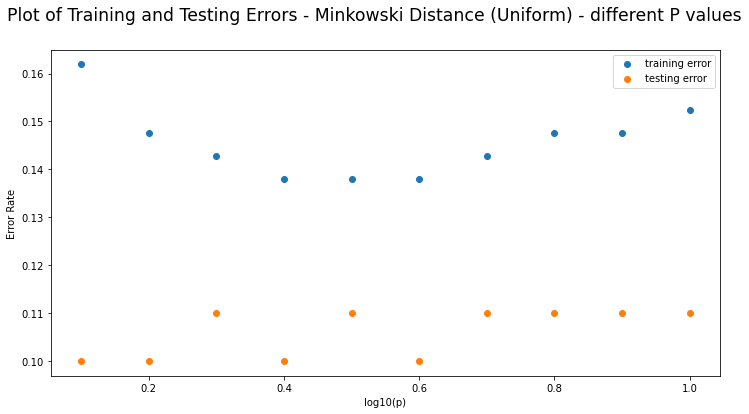

In [17]:
# Plot training and testing errors for different log10(p) values - Minkowski distance
df_knn_accuracy_minkowski = df_knn_accuracy[(df_knn_accuracy.distance_type == 'Minkowski') & (df_knn_accuracy.weight_type == 'Uniform')]
plt.scatter(np.log10(list(df_knn_accuracy_minkowski['p'])), df_knn_accuracy_minkowski['training_error_rate'], label = 'training error')
plt.scatter(np.log10(list(df_knn_accuracy_minkowski['p'])), df_knn_accuracy_minkowski['testing_error_rate'], label = 'testing error')

plt.rcParams["figure.figsize"] = (12,6)
plt.suptitle('Plot of Training and Testing Errors - Minkowski Distance (Uniform) - different P values', fontsize = 'xx-large')
plt.xlabel('log10(p)')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

In [18]:
# Get the best testing error rate of different log10(p) values using Minkowski distance
df_knn_accuracy_minkowski_best = df_knn_accuracy_minkowski[df_knn_accuracy_minkowski.testing_error_rate == df_knn_accuracy_minkowski.testing_error_rate.min()]
df_knn_accuracy_minkowski_best['log10p'] = np.log10(list(df_knn_accuracy_minkowski_best['p']))
print(df_knn_accuracy_minkowski_best)


    distance_type weight_type   k         p training_error_rate  \
248     Minkowski     Uniform  26  1.258925            0.161905   
249     Minkowski     Uniform  26  1.584893            0.147619   
251     Minkowski     Uniform  26  2.511886            0.138095   
253     Minkowski     Uniform  26  3.981072            0.138095   

    testing_error_rate  log10p  
248                0.1     0.1  
249                0.1     0.2  
251                0.1     0.4  
253                0.1     0.6  


<ipython-input-18-be768599091a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_knn_accuracy_minkowski_best['log10p'] = np.log10(list(df_knn_accuracy_minkowski_best['p']))


> log10(p) at 0.1, 0.2, 0.4, and 0.6 gives the best test errors at 10% when using k = 26

<font size = "2.5"><b> (d)-i-C. which becomes Chebyshev Distance with p → ∞ </font>

In [19]:
# K-Nearest Neighbor using Chebyshev Distance

for k in list_k:
    knn_chebyshev = KNeighborsClassifier(n_neighbors = k, p = np.inf)
    knn_chebyshev.fit(X_train, y_train)
    training_error_rate = 1 - knn_chebyshev.score(X_train, y_train)
    testing_error_rate = 1 - knn_chebyshev.score(X_test, y_test)
    df_knn_accuracy.loc[len(df_knn_accuracy), :] = ['Chebyshev', 'Uniform', k, np.inf, training_error_rate, testing_error_rate]


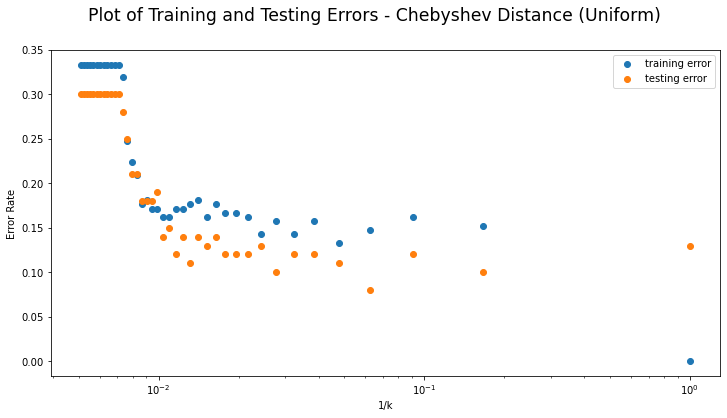

In [20]:
# Plot training and testing errors for different k values - Chebyshev distance
df_knn_accuracy_chebyshev = df_knn_accuracy[(df_knn_accuracy.distance_type == 'Chebyshev') & (df_knn_accuracy.weight_type == 'Uniform')]
plt.scatter(1/df_knn_accuracy_chebyshev['k'], df_knn_accuracy_chebyshev['training_error_rate'], label = 'training error')
plt.scatter(1/df_knn_accuracy_chebyshev['k'], df_knn_accuracy_chebyshev['testing_error_rate'], label = 'testing error')

plt.rcParams["figure.figsize"] = (12,6)
plt.suptitle('Plot of Training and Testing Errors - Chebyshev Distance (Uniform)', fontsize = 'xx-large')
plt.xlabel('1/k')
plt.ylabel('Error Rate')
plt.xscale('log')
plt.legend()
plt.show()

In [21]:
# Get the best testing error rate of different k using Chebyshev distance
df_knn_accuracy_chebyshev_best = df_knn_accuracy_chebyshev[df_knn_accuracy_chebyshev.testing_error_rate == df_knn_accuracy_chebyshev.testing_error_rate.min()]
print(df_knn_accuracy_chebyshev_best)



    distance_type weight_type   k    p training_error_rate testing_error_rate
261     Chebyshev     Uniform  16  inf            0.147619               0.08


> k = 16 gives the best test error rate at 8% for Chebyshev distance

<font size = "3"><b> (d)-ii. Mahalanobis Distance </font>

In [22]:
# K-Nearest Neighbor using Mahalanobis Distance

for k in list_k:
    knn_mahalanobis = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', metric_params = {'V' : np.cov(X_train, rowvar = False)})
    knn_mahalanobis.fit(X_train, y_train)
    training_error_rate = 1 - knn_mahalanobis.score(X_train, y_train)
    testing_error_rate = 1 - knn_mahalanobis.score(X_test, y_test)
    df_knn_accuracy.loc[len(df_knn_accuracy), :] = ['Mahalanobis', 'Uniform', k, np.nan, training_error_rate, testing_error_rate]



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklea

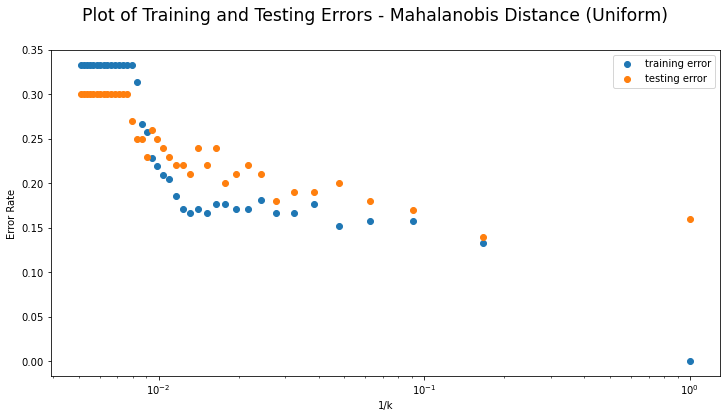

In [23]:
# Plot training and testing errors for different k values - Mahalanobis distance
df_knn_accuracy_mahalanobis = df_knn_accuracy[(df_knn_accuracy.distance_type == 'Mahalanobis') & (df_knn_accuracy.weight_type == 'Uniform')]
plt.scatter(1/df_knn_accuracy_mahalanobis['k'], df_knn_accuracy_mahalanobis['training_error_rate'], label = 'training error')
plt.scatter(1/df_knn_accuracy_mahalanobis['k'], df_knn_accuracy_mahalanobis['testing_error_rate'], label = 'testing error')

plt.rcParams["figure.figsize"] = (12,6)
plt.suptitle('Plot of Training and Testing Errors - Mahalanobis Distance (Uniform)', fontsize = 'xx-large')
plt.xlabel('1/k')
plt.ylabel('Error Rate')
plt.xscale('log')
plt.legend()
plt.show()

In [24]:
# Get the best testing error rate of different k values using Mahalanobis distance
df_knn_accuracy_mahalanobis_best = df_knn_accuracy_mahalanobis[df_knn_accuracy_mahalanobis.testing_error_rate == df_knn_accuracy_mahalanobis.testing_error_rate.min()]
print(df_knn_accuracy_mahalanobis_best)



    distance_type weight_type  k    p training_error_rate testing_error_rate
299   Mahalanobis     Uniform  6  NaN            0.133333               0.14


> For Mahalanobis distance, the best test error rate is 14% and occurs when k = 6

# (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

<font size = "3"><b> (e)-i. Euclidean - Weighted Distance </font>

In [25]:
# Euclidean - Weighted distance

for k in list_k:
    knn_euclidean_weighted = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    knn_euclidean_weighted.fit(X_train, y_train)
    training_error_rate = 1 - knn_euclidean_weighted.score(X_train, y_train)
    testing_error_rate = 1 - knn_euclidean_weighted.score(X_test, y_test)
    df_knn_accuracy.loc[len(df_knn_accuracy), :] = ['Euclidean', 'Weighted', k, 2, training_error_rate, testing_error_rate]


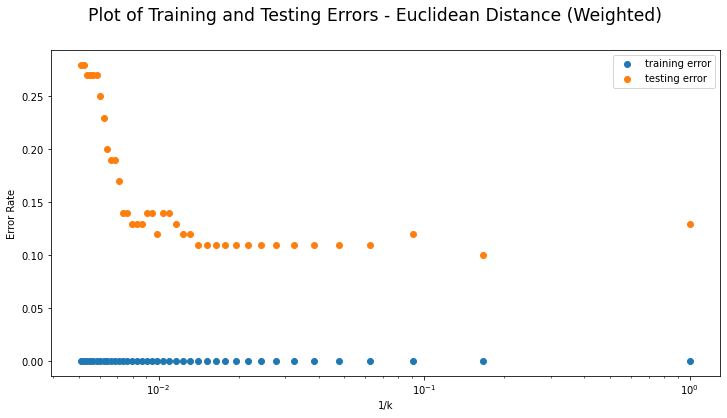

In [26]:
# Plot training and testing errors for different k values - Euclidean distance (Weighted)
df_knn_accuracy_euclidean_weighted = df_knn_accuracy[(df_knn_accuracy.distance_type == 'Euclidean') & (df_knn_accuracy.weight_type == 'Weighted')]
plt.scatter(1/df_knn_accuracy_euclidean_weighted['k'], df_knn_accuracy_euclidean_weighted['training_error_rate'], label = 'training error')
plt.scatter(1/df_knn_accuracy_euclidean_weighted['k'], df_knn_accuracy_euclidean_weighted['testing_error_rate'], label = 'testing error')

plt.rcParams["figure.figsize"] = (12,6)
plt.suptitle('Plot of Training and Testing Errors - Euclidean Distance (Weighted)', fontsize = 'xx-large')
plt.xlabel('1/k')
plt.ylabel('Error Rate')
plt.xscale('log')
plt.legend()
plt.show()

> I'm getting 0% error rate for the training set which I think it's expected as the inverse of the distance of the same point would be 1/0 which is infinity and outweigh all the other inverses of distance. Therefore, the prediction of the class will be the training data point itself which is 100% correct

In [27]:
# Get the best testing error rate of different k values using Euclidean distance (Weighted)
df_knn_accuracy_euclidean_weighted_best = df_knn_accuracy_euclidean_weighted[df_knn_accuracy_euclidean_weighted.testing_error_rate == df_knn_accuracy_euclidean_weighted.testing_error_rate.min()]
print(df_knn_accuracy_euclidean_weighted_best)


    distance_type weight_type  k  p training_error_rate testing_error_rate
339     Euclidean    Weighted  6  2                 0.0                0.1


> The best test error rate for Euclidean distance - weighted decision occurs at k = 6. The test error rate is at 10%

<font size = "3"><b> (e)-i. Manhattan - Weighted Distance </font>

In [28]:
# Manhattan 

for k in list_k:
    knn_manhattan_weighted = KNeighborsClassifier(n_neighbors = k, p = 1, weights = 'distance')
    knn_manhattan_weighted.fit(X_train, y_train)
    training_error_rate = 1 - knn_manhattan_weighted.score(X_train, y_train)
    testing_error_rate = 1 - knn_manhattan_weighted.score(X_test, y_test)
    df_knn_accuracy.loc[len(df_knn_accuracy), :] = ['Manhattan', 'Weighted', k, 1, training_error_rate, testing_error_rate]


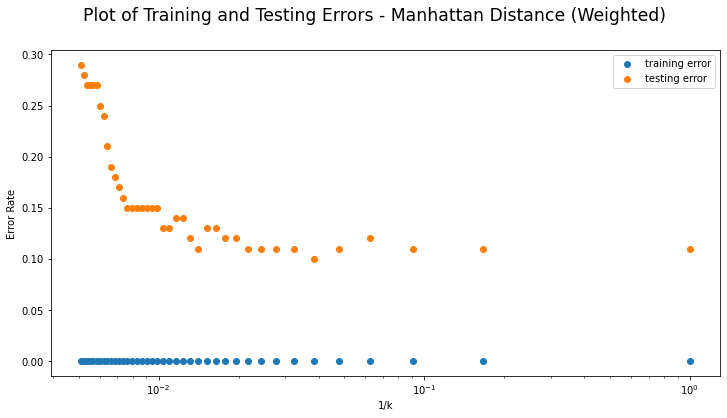

In [29]:
# Plot training and testing errors for different k values - Manhattan distance (Weighted)
df_knn_accuracy_manhattan_weighted = df_knn_accuracy[(df_knn_accuracy.distance_type == 'Manhattan') & (df_knn_accuracy.weight_type == 'Weighted')]
plt.scatter(1/df_knn_accuracy_manhattan_weighted['k'], df_knn_accuracy_manhattan_weighted['training_error_rate'], label = 'training error')
plt.scatter(1/df_knn_accuracy_manhattan_weighted['k'], df_knn_accuracy_manhattan_weighted['testing_error_rate'], label = 'testing error')

plt.rcParams["figure.figsize"] = (12,6)
plt.suptitle('Plot of Training and Testing Errors - Manhattan Distance (Weighted)', fontsize = 'xx-large')
plt.xlabel('1/k')
plt.ylabel('Error Rate')
plt.xscale('log')
plt.legend()
plt.show()

In [30]:
# Get the best testing error rate of different k values using Manhattan distance (Weighted)
df_knn_accuracy_manhattan_weighted_best = df_knn_accuracy_manhattan_weighted[df_knn_accuracy_manhattan_weighted.testing_error_rate == df_knn_accuracy_manhattan_weighted.testing_error_rate.min()]
print(df_knn_accuracy_manhattan_weighted_best)


    distance_type weight_type   k  p training_error_rate testing_error_rate
383     Manhattan    Weighted  26  1                 0.0                0.1


> The best test error rate for Manhattan distance - weighted decision occurs at k = 26. The test error rate is at 10%

In [31]:
# Chebyshev

for k in list_k:
    knn_chebyshev_weighted = KNeighborsClassifier(n_neighbors = k, p = np.inf, weights = 'distance')
    knn_chebyshev_weighted.fit(X_train, y_train)
    training_error_rate = 1 - knn_chebyshev_weighted.score(X_train, y_train)
    testing_error_rate = 1 - knn_chebyshev_weighted.score(X_test, y_test)
    df_knn_accuracy.loc[len(df_knn_accuracy), :] = ['Chebyshev', 'Weighted', k, np.inf, training_error_rate, testing_error_rate]
    

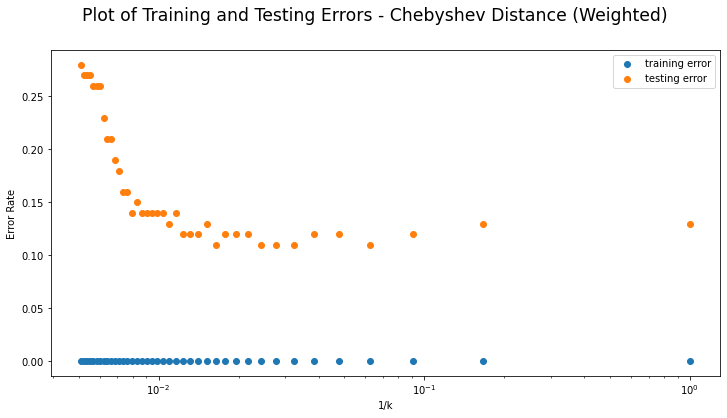

In [32]:
# Plot training and testing errors for different k values - Chebyshev distance (Weighted)
df_knn_accuracy_chebyshev_weighted = df_knn_accuracy[(df_knn_accuracy.distance_type == 'Chebyshev') & (df_knn_accuracy.weight_type == 'Weighted')]
plt.scatter(1/df_knn_accuracy_chebyshev_weighted['k'], df_knn_accuracy_chebyshev_weighted['training_error_rate'], label = 'training error')
plt.scatter(1/df_knn_accuracy_chebyshev_weighted['k'], df_knn_accuracy_chebyshev_weighted['testing_error_rate'], label = 'testing error')

plt.rcParams["figure.figsize"] = (12,6)
plt.suptitle('Plot of Training and Testing Errors - Chebyshev Distance (Weighted)', fontsize = 'xx-large')
plt.xlabel('1/k')
plt.ylabel('Error Rate')
plt.xscale('log')
plt.legend()
plt.show()

In [33]:
# Get the best testing error rate of different k values using Manhattan distance (Weighted)
df_knn_accuracy_chebyshev_weighted_best = df_knn_accuracy_chebyshev_weighted[df_knn_accuracy_chebyshev_weighted.testing_error_rate == df_knn_accuracy_chebyshev_weighted.testing_error_rate.min()]
print(df_knn_accuracy_chebyshev_weighted_best)


    distance_type weight_type   k    p training_error_rate testing_error_rate
421     Chebyshev    Weighted  16  inf                 0.0               0.11
424     Chebyshev    Weighted  31  inf                 0.0               0.11
425     Chebyshev    Weighted  36  inf                 0.0               0.11
426     Chebyshev    Weighted  41  inf                 0.0               0.11
430     Chebyshev    Weighted  61  inf                 0.0               0.11


> The best test error rate for Chebyshev - Weighted distance is at 11% when k = 16, 31, 36, 41, and 61

# (f) What is the lowest training error rate you achieved in this homework?

In [34]:
df_knn_accuracy_best = df_knn_accuracy.groupby(['distance_type', 'weight_type'])['testing_error_rate'].min()
print(df_knn_accuracy_best)


distance_type  weight_type
Chebyshev      Uniform        0.08
               Weighted       0.11
Euclidean      Uniform        0.06
               Weighted       0.10
Mahalanobis    Uniform        0.14
Manhattan      Uniform        0.11
               Weighted       0.10
Minkowski      Uniform        0.10
Name: testing_error_rate, dtype: float64


> The best test error rate gotten in this homework based on different variations in distance type and weighting type is at 8% when using Chebyshev distance - Uniform weighting type (Majority Polling decision)

In [38]:
df_knn_accuracy_best_train = df_knn_accuracy.groupby(['distance_type', 'weight_type'])['training_error_rate'].min()
print(df_knn_accuracy_best_train)


distance_type  weight_type
Chebyshev      Uniform        0.000000
               Weighted       0.000000
Euclidean      Uniform        0.000000
               Weighted       0.000000
Mahalanobis    Uniform        0.000000
Manhattan      Uniform        0.000000
               Weighted       0.000000
Minkowski      Uniform        0.138095
Name: training_error_rate, dtype: float64


> The best training error rate gotten in this homework is at 0% which is expected since we also used the variation where k = 0 where the model will predict correctly as it uses the training data point itself